In [1]:
import pandas as pd
from math import sqrt
from scipy.stats import norm, t
from matplotlib import pyplot as plt

In [2]:
datafile = "../../dataset/ch15/nashville.txt"
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.head()

,Gestation Time
0,251
1,263
2,265
3,240
4,268


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gestation Time  70 non-null     int64
dtypes: int64(1)
memory usage: 692.0 bytes


In [5]:
gestation = data['Gestation Time']

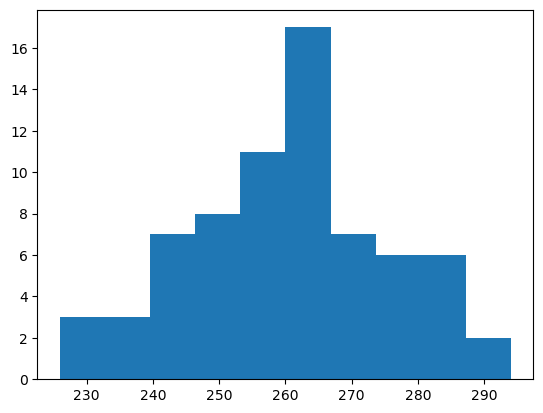

In [6]:
gestation.hist(grid=False);

Histogram suggests that the sample was likely drawn from a unimodal symmetric distribution.  By CLT, we may assume normal population.  As we do not know $\sigma$ and must estimate it, we resort to t-statistics.

In [7]:
mu = 266  # H0

In [8]:
ybar = gestation.mean()
ybar

260.3142857142857

In [9]:
sy = gestation.std(ddof=1)
sy

15.257730620419936

In [10]:
SE = sy/sqrt(gestation.size)
SE

1.8236476151043315

The null hypothesis assumes mean $266$, and we can further assume the standard deviation is around $1.82$.

In [11]:
tstat = (ybar - mu) / SE
tstat

-3.117770252664208

In [12]:
pval = t.cdf(tstat, gestation.size-1) * 2
pval

0.002657214072817423

In [14]:
print(f"One-sample, two-sided t-test. p-value: {pval:.6f}")

One-sample, two-sided t-test. p-value: 0.002657


In [15]:
tstar = t.ppf(0.975, gestation.size-1)

In [18]:
(ybar-SE*tstar, ybar +SE*tstar)

(256.6762082666272, 263.95236316194416)